# Ford GoBike Trip Data - Exploration
## by Eslam Aly


> Ford GoBike is a bike share system located in the Bay Area, more specifically in San Francisco, East Bay, and San Jose. With 7,000 bikes distributed across those 3 regions, customers have the feasibility to unlock bikes from one station and return to any other station in the system, making them ideal for one-way trips.

> This data set includes information about individual rides made in Ford GoBike system covering the greater San Francisco Bay area in 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Data Gathering

> The data is downloaded from the Udacity webpage: Project: Communicate Data Findings

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(df.shape)
print(df.dtypes)
df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Dataset Structure:

> The dataset contains about 183,000 rows and 16 features.

### Main features of interest:

> I am most interested in figuring out the best features that affect the trips durations.

### Features in the dataset to use:

1. Trip Duration in sec
2. User Type (Customer or Subscriber)
3. Member Birth Year
4. Member Gender (Male or Female)

## Data Assessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Finding the NaN values. And their sum.
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Finding the duplicated values. And their sum.
df.duplicated().sum()

0

## Data Cleaning

1. NAN Values:

. As the number of NAN values is relativley low compared to the total rows of the dataset, i will drop these rows.

In [7]:
# Dropping NaN values
df.dropna(axis = 0, inplace = True)

In [8]:
# Testing after removing NaN
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
# Dropping unneeded columns
df.drop(['start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip'], axis = 1, inplace = True)

2. Members birth dates:

. The oldest person worldwide in 2018 was born in 1903, so all the records for birth date before 1903 will be dropped.

In [10]:
df.drop(df.query('member_birth_year < 1903').index, axis = 0, inplace = True)

3. Convert Members Birth Year to Age.

In [11]:
# Convreting birth year to age.
# As the data was collected in 2018, so it will be the refrence.
df.member_birth_year = 2018 - df.member_birth_year
df.rename(columns = {'member_birth_year': 'member_age'}, inplace = True)

In [12]:
# Testing after renaming the member birth year column to member age.
# Final data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174881 entries, 0 to 183411
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   duration_sec   174881 non-null  int64  
 1   user_type      174881 non-null  object 
 2   member_age     174881 non-null  float64
 3   member_gender  174881 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.7+ MB


## Data after cleaning:
. The dataset was intially 183412 records and 16 columns.
. After cleaning, the data is 174881 records and 4 columns.

## Questions that i am trying to answer:
> What are the main features that affect the trips durations?

> Which gender is more likely to use the service?

> What is the age of users who use the service mostly?

> Who is more likely to use the service (customer or subscriber)?

## Univariate Exploration


In [13]:
df.describe()

,duration_sec,member_age
count,174881.000000,174881.000000
mean,704.022490,33.162470
std,1642.510189,9.975578
min,61.000000,17.000000
25%,323.000000,26.000000
50%,510.000000,31.000000
75%,789.000000,38.000000
max,84548.000000,108.000000


In [14]:
# As the duration column has a very large maximum value compared to min (right skewed).
# I calculated the median to get the average value.
df.duration_sec.median()

510.0

In [15]:
# Getting the record for duration more than 3000 sec (50 mins) which is the logic average of duration.
df.query('duration_sec > 3000').shape[0]

1924

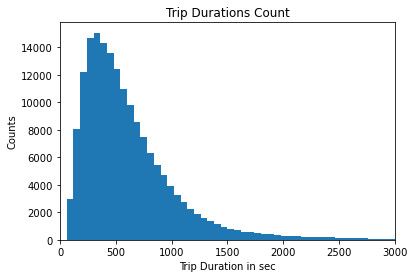

In [30]:
bins = np.arange(0, 3000+60, 60)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim(0, 3000);
plt.xlabel('Trip Duration in sec');
plt.ylabel('Counts');
plt.title('Trip Durations Count');

. The trip durations in sec is right skewed with a peak of around 500 (noting that the median calculated above is 510).

. The data has a maximum of trip durations of 84,548 sec = 23 hrs, which is a very large duration. So, i excluded large durations (more than 3000 sec = 50 mins).

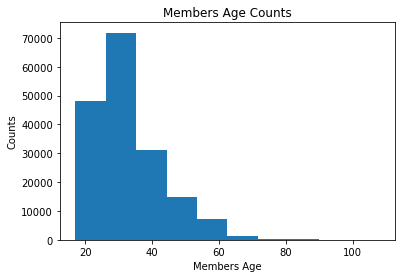

In [31]:
plt.hist(data = df, x = 'member_age');
plt.xlabel('Members Age');
plt.ylabel('Counts');
plt.title('Members Age Counts');

. The distribution seems logic with peak of people having around (28-33 years old).

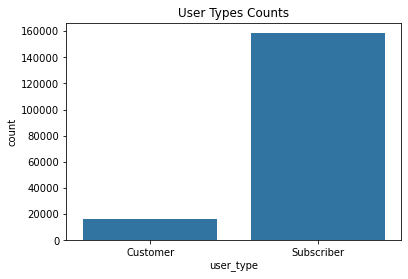

In [32]:
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = default_color);
plt.title('User Types Counts');

. The subscribers are the most of the users, which is logic as most probably, the application requires first for a user to make an account.

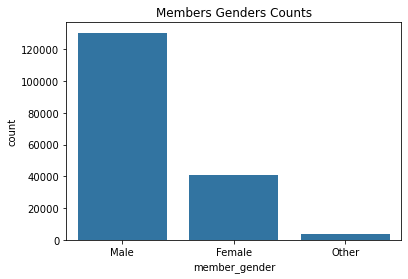

In [33]:
sb.countplot(data = df, x = 'member_gender', color = default_color, order = df.member_gender.value_counts().index);
plt.title('Members Genders Counts');

. Males are more frequent to use bikes as a transportation method.

## Bivariate Exploration


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174881 entries, 0 to 183411
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   duration_sec   174881 non-null  int64  
 1   user_type      174881 non-null  object 
 2   member_age     174881 non-null  float64
 3   member_gender  174881 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.7+ MB


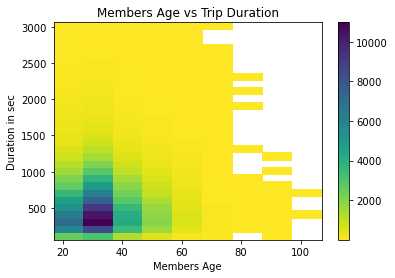

In [34]:
ybins = np.arange(60, 3000+100, 100)
xbins = np.arange(17, 100+10, 10)
plt.hist2d(data = df, x = 'member_age', y = 'duration_sec', cmin = 0.5, bins = [xbins, ybins], cmap = 'viridis_r');
plt.xlabel('Members Age')
plt.ylabel('Duration in sec');
plt.colorbar();
plt.title('Members Age vs Trip Duration');

. Most of the trips durations are made by people of age between 17 and 40 years.

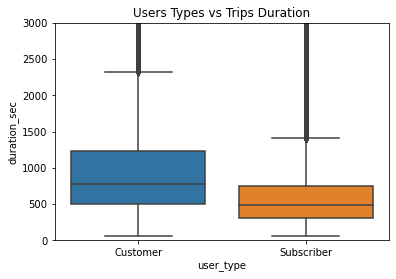

In [35]:
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec');
plt.ylim(0, 3000);
plt.title('Users Types vs Trips Duration');

. The customer user types are making higher trip durations than the subscribers, this could be because the customers are just trying the system so they need to get the most benefit of the experience. Unlike the subscribers who are usually using the system during their routine (short trips).

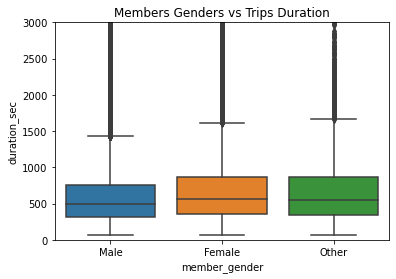

In [36]:
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', order = df.member_gender.value_counts().index);
plt.ylim(0, 3000);
plt.title('Members Genders vs Trips Duration');

. Surprisingly, the females are making slightly higher durations than men drivers.

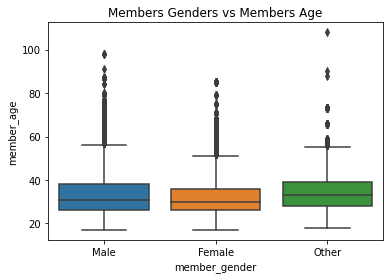

In [37]:
sb.boxplot(data = df, x = 'member_gender', y = 'member_age', order = df.member_gender.value_counts().index);
plt.title('Members Genders vs Members Age');

. Men drivers are higher in age compared with females.

## Multivariate Exploration


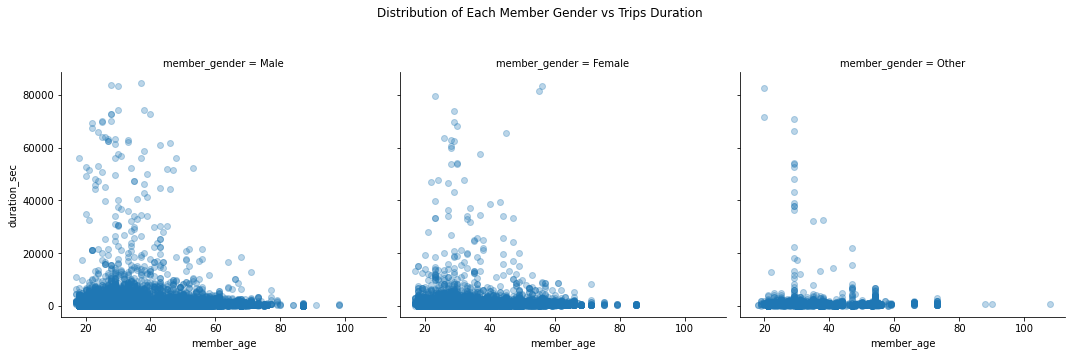

In [45]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 5, col_order = df.member_gender.value_counts().index)
g.map(plt.scatter, 'member_age', 'duration_sec', alpha = 0.3)
g.add_legend();
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Each Member Gender vs Trips Duration');

. Men with high age are making higher trip durations more than females with high age.

. In low age comparison, the number are mostly the same.

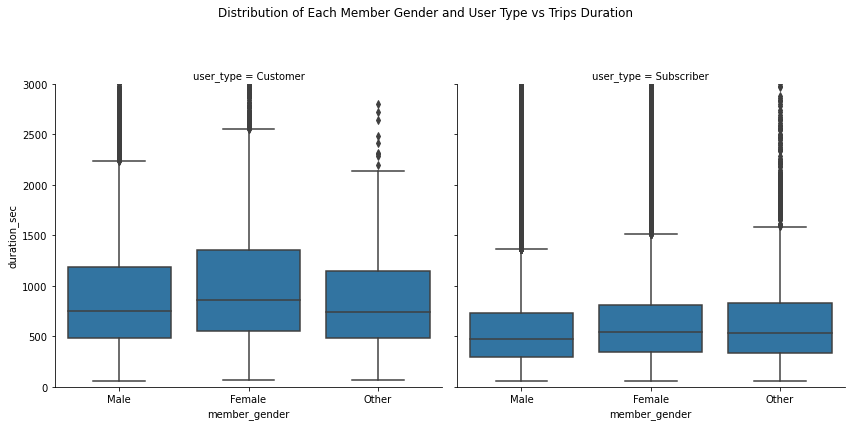

In [46]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 6)
g.map(sb.boxplot, 'member_gender', 'duration_sec', order = df.member_gender.value_counts().index)
plt.ylim(0, 3000);
g.add_legend();
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Each Member Gender and User Type vs Trips Duration');

. Female customrs are making higher durations than male customers and all subscribers.

. Female subscribers are making higher durations than male subscribers.

. My increasing tendency is even more increased. Even males counts is much higher than females, the females drivers are making higher trips than men whether they are customers or subscribers.